In [1]:
import pandas as pd
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
import scipy.stats as stats
import plotly.express as px
from plotly import graph_objects as go
from scipy.stats import levene, mannwhitneyu, shapiro

In [2]:
google_play = pd.read_csv(r'Google-Playstore.csv')

google_play.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [3]:
google_play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [4]:
google_play.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


In [5]:
#Cálculo de valores ausentes
print(google_play.isna().sum())

App Name                  5
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64


In [6]:
#Eliminamos todas las filas que contengan valores ausentes
google_play.dropna(inplace=True)
print(google_play.isna().sum())

App Name             0
App Id               0
Category             0
Rating               0
Rating Count         0
Installs             0
Minimum Installs     0
Maximum Installs     0
Free                 0
Price                0
Currency             0
Size                 0
Minimum Android      0
Developer Id         0
Developer Website    0
Developer Email      0
Released             0
Last Updated         0
Content Rating       0
Privacy Policy       0
Ad Supported         0
In App Purchases     0
Editors Choice       0
Scraped Time         0
dtype: int64


In [7]:
google_play.duplicated().sum()

np.int64(0)

Vamos a tomar en cuenta solo los datos de los últimos 5 años, filtramos los datos.

In [15]:
# Transformo la columna 'Scraped Time' y la columna 'Released' a formato datetime
google_play['Scraped Time'] = pd.to_datetime(google_play['Scraped Time'], errors='coerce')
google_play['Released'] = pd.to_datetime(google_play['Released'], errors='coerce')

In [18]:
#La fecha máxima de información de las apps
max_date = google_play['Scraped Time'].max()

print(f"Fecha máximo: {max_date}")

Fecha máximo: 2021-06-16 15:10:42


In [19]:
#Filtramos los datos para obtener información solo con apps de los 5 años (2016-2021)
filter_date_2016 = pd.Timestamp('2016-06-16')
google_play_2016 = google_play[google_play['Released'] >= filter_date_2016]

### Separación de Variables

In [20]:
variables_numericas = google_play.select_dtypes(include=['int64', 'float64']).columns.tolist()
variables_categoricas = google_play.select_dtypes(include=['object', 'category']).columns.tolist()
variables_booleanas = google_play.select_dtypes(include=['bool']).columns.tolist()

In [22]:
variables_numericas

['Rating', 'Rating Count', 'Minimum Installs', 'Maximum Installs', 'Price']

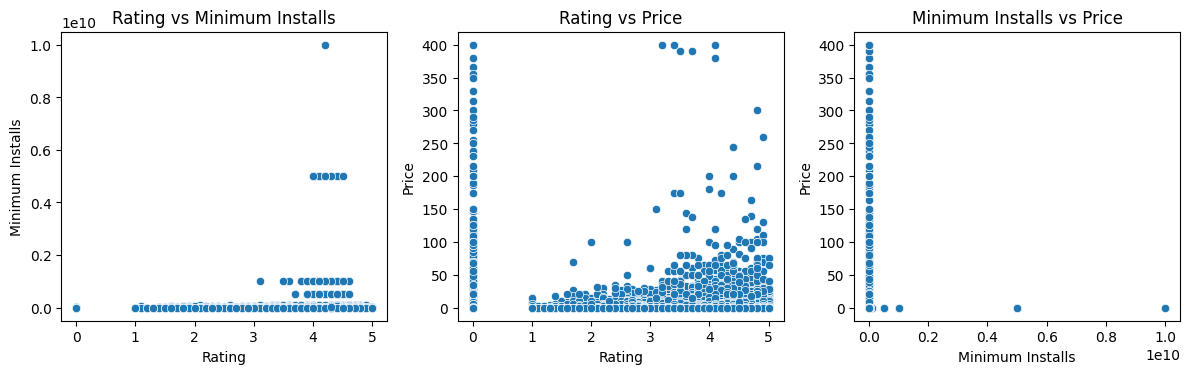

In [37]:
# Gráfico para comparar 'Rating' con 'Minimum Installs'
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(x='Rating', y='Minimum Installs', data=google_play)
plt.title('Rating vs Minimum Installs')

# Gráfico para comparar 'Rating' con 'Price'
plt.subplot(1, 3, 2)
sns.scatterplot(x='Rating', y='Price', data=google_play)
plt.title('Rating vs Price')

# Gráfico para comparar 'Minimum Installs' con 'Price'
plt.subplot(1, 3, 3)
sns.scatterplot(x='Minimum Installs', y='Price', data=google_play)
plt.title('Minimum Installs vs Price')

# Ajustar el diseño para que no se superpongan
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [23]:
variables_categoricas

['App Name',
 'App Id',
 'Category',
 'Installs',
 'Currency',
 'Size',
 'Minimum Android',
 'Developer Id',
 'Developer Website',
 'Developer Email',
 'Last Updated',
 'Content Rating',
 'Privacy Policy']

In [24]:
variables_booleanas

['Free', 'Ad Supported', 'In App Purchases', 'Editors Choice']

### Filtraremos las categorias con apps mas descargadas


In [25]:
#Las categorias con aplicaciones mas descargadas
category_installs = google_play_2016.groupby('Category')['Minimum Installs'].sum()
category_installs = category_installs.sort_values(ascending=False)
print(category_installs.head(10))

Category
Tools                      1.474550e+10
Action                     9.005242e+09
Casual                     7.095956e+09
Simulation                 6.867910e+09
Arcade                     6.420308e+09
Puzzle                     6.028710e+09
Entertainment              5.478226e+09
Racing                     3.708377e+09
Video Players & Editors    3.584848e+09
Photography                3.576655e+09
Name: Minimum Installs, dtype: float64


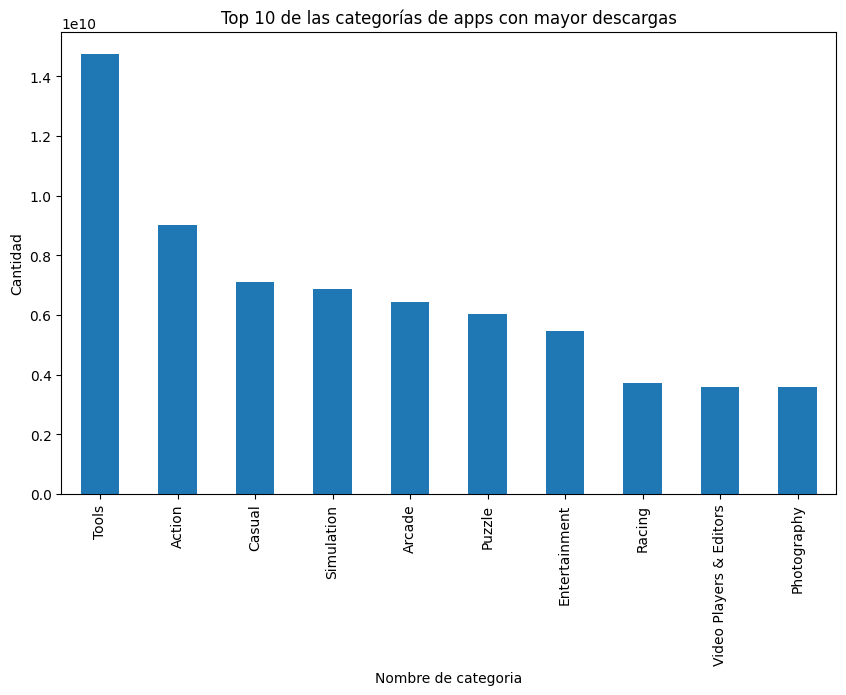

In [26]:
# Grafico de las categorias de aplicaciones con mas descargas
plt.figure(figsize=(10, 6))
category_installs.head(10).plot(kind='bar')
plt.title('Top 10 de las categorías de apps con mayor descargas')
plt.xlabel('Nombre de categoria')
plt.ylabel('Cantidad')
plt.show()

Ahora sabemos que las categorias de apps con mayor instalaciones son 'Tools', 'Action' y 'Casual', nuestra tarea es averiguar las aplicaciones dentro de estas categorias con rating = 5.0 y que tengan un precio mayor a $0.01

In [40]:
#Cálculo de las apps con mayor rating y que sean de pago de la categoria Tools
tools_paid_apps_with_max_rating = google_play_2016[(google_play_2016['Price'] > 0.01) & 
                                              (google_play_2016['Rating'] == 5.0) & 
                                              (google_play_2016['Category'] == 'Tools')]

# Ordeno por la columna 'Minimum Installs' en orden descendente y seleccionamos las primeras 10
tools_paid_apps_with_max_rating = tools_paid_apps_with_max_rating.sort_values(by='Minimum Installs', ascending=False).head(10)

# Eliminamos las columnas no deseadas del DataFrame
tools_paid_apps_with_max_rating = tools_paid_apps_with_max_rating.drop(['Rating Count', 'Maximum Installs', 'Scraped Time'], axis=1)

# Mostrar las apps que cumplen con las condiciones
print('apps con mayor rating y que sean de pago de la categoria Tools')
print(tools_paid_apps_with_max_rating[['App Name', 'Category', 'Minimum Installs', 'Rating', 'Price']].head())

apps con mayor rating y que sean de pago de la categoria Tools
                                                  App Name Category  \
317796                                       KeePassDX Pro    Tools   
985303                                easy Pipe fitter Pro    Tools   
2179145  Electronics Plus Pro:Calculator,Datasheet,Lear...    Tools   
254544                                      Weather Widget    Tools   
1856833  MathMaster - Triangles, Circles, Pyramids and ...    Tools   

         Minimum Installs  Rating  Price  
317796             1000.0     5.0  10.00  
985303             1000.0     5.0   2.99  
2179145             500.0     5.0   1.99  
254544              100.0     5.0   1.49  
1856833             100.0     5.0   1.99  


In [41]:
#Cálculo de las apps con mayor rating y que sean de pago de la categoria Action
tools_paid_apps_with_max_rating = google_play_2016[(google_play_2016['Price'] > 0.01) & 
                                              (google_play_2016['Rating'] == 5.0) & 
                                              (google_play_2016['Category'] == 'Action')]

# Ordeno por la columna 'Minimum Installs' en orden descendente y seleccionamos las primeras 10
tools_paid_apps_with_max_rating = tools_paid_apps_with_max_rating.sort_values(by='Minimum Installs', ascending=False).head(10)

# Eliminamos las columnas no deseadas del DataFrame
tools_paid_apps_with_max_rating = tools_paid_apps_with_max_rating.drop(['Rating Count', 'Maximum Installs', 'Scraped Time'], axis=1)

# Mostrar las apps que cumplen con las condiciones
print('apps con mayor rating y que sean de pago de la categoria Action')
print(tools_paid_apps_with_max_rating[['App Name', 'Category', 'Minimum Installs', 'Rating', 'Price']].head())

apps con mayor rating y que sean de pago de la categoria Action
                App Name Category  Minimum Installs  Rating  Price
955146               深夜廻   Action            1000.0     5.0  18.99
852025  Anxiety of Alina   Action              50.0     5.0   1.99


In [43]:
#Cálculo de las apps con mayor rating y que sean de pago de la categoria Casual
tools_paid_apps_with_max_rating = google_play_2016[(google_play_2016['Price'] > 0.01) & 
                                              (google_play_2016['Rating'] == 5.0) & 
                                              (google_play_2016['Category'] == 'Casual')]

# Ordeno por la columna 'Minimum Installs' en orden descendente y seleccionamos las primeras 10
tools_paid_apps_with_max_rating = tools_paid_apps_with_max_rating.sort_values(by='Minimum Installs', ascending=False).head(10)

# Eliminamos las columnas no deseadas del DataFrame
tools_paid_apps_with_max_rating = tools_paid_apps_with_max_rating.drop(['Rating Count', 'Maximum Installs', 'Scraped Time'], axis=1)

# Mostrar las apps que cumplen con las condiciones
print('apps con mayor rating y que sean de pago de la categoria Casual')
print(tools_paid_apps_with_max_rating[['App Name', 'Category', 'Minimum Installs', 'Rating', 'Price']].head())

apps con mayor rating y que sean de pago de la categoria Casual
               App Name Category  Minimum Installs  Rating  Price
1630950   당신을 기다리는 여우 花   Casual           10000.0     5.0   4.49
1673078   Melbits World   Casual             100.0     5.0   2.99
935411   Tornado Driver   Casual              10.0     5.0   0.99
73693           Nut Nut   Casual              10.0     5.0   0.99


Pasandolo a Excel

In [46]:
google_play_2016 = google_play_2016.head(1000000)

In [47]:
google_play_2016.to_excel('Google-Playstore.xlsx', index=False)

IllegalCharacterError: Ace Studio cannot be used in worksheets.